In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from dataloader import DataLoader
from parser import Extractor
from helpers import df_maker

In [2]:
teachers = df_maker()
teachers.head(3)

,Name,Url,Table,SI,NameAbbr,EngName,EngNameAbbr,LastName,EngLastName
0,Аббасов Меджид Эльхан оглы,https://apmath.spbu.ru/fakultet/spisok-i-rejti...,Математической теории микропроцессорных систем...,https://www.elibrary.ru/author_items.asp?autho...,Аббасов М.Э.,Abbasov Medzhid El'han ogly,Abbasov M.E.,Аббасов,Abbasov
1,Александров Александр Юрьевич,https://apmath.spbu.ru/fakultet/spisok-i-rejti...,Управления медико-биологическими системами,https://www.elibrary.ru/author_items.asp?autho...,Александров А.Ю.,Aleksandrov Aleksandr Jur'evich,Aleksandrov A.J.,Александров,Aleksandrov
2,Алисейко Алексей Николаевич,NaN,Теории управления,https://www.elibrary.ru/author_profile.asp?id=...,Алисейко А.Н.,Alisejko Aleksej Nikolaevich,Alisejko A.N.,Алисейко,Alisejko


In [3]:
teachers[teachers['LastName'] == 'Кузютин']

,Name,Url,Table,SI,NameAbbr,EngName,EngNameAbbr,LastName,EngLastName
96,Кузютин Денис Вячеславович,https://apmath.spbu.ru/fakultet/spisok-i-rejti...,Математической теории игр и статистических реш...,https://www.elibrary.ru/author_items.asp?autho...,Кузютин Д.В.,Kuzjutin Denis Vjacheslavovich,Kuzjutin D.V.,Кузютин,Kuzjutin


In [4]:
extractor = Extractor(teachers)
data = extractor.extract()
data

{'Аббасов': ['Abbasov M. E., Sharlay A. S. Variational Approach for Finding the Cost-Optimal Trajectory // Math Models Comput Simul.\xa02024. Т. 16. Р. 293–301. https://doi.org/10.1134/S2070048224020030',
  'Аббасов\xa0М.\xa0Э., Шарлай А.\xa0С . Метод поиска оптимальной по\xa0стоимости траектории дороги на\xa0поверхности местности // Вестн. С.-Петербург. ун-та. Сер.\xa010. Прикл. матем. Информ. Проц. упр.\xa02023. Т. 19 (2). С. 139–147.',
  'Abbasov Majid E. Directional Differentiability, Coexhausters, Codifferentials and Polyhedral DC\xa0Functions // Taiwanese J. Math. Advance Publication\xa01. 2022. https://doi.org/10.11650/tjm/221201',
  'Abbasov Majid E. Finding the set of global minimizers of a piecewise affine function // Journal of Global Optimization. Springer, 2022.',
  'Аббасов М. Э., Шарлай А. С. Поиск оптимальной по стоимости строительства траектории дороги на рельефе местности // Вестн. С.-Петербург. ун-та. Сер. 10. Прикл. матем. Информ. Проц. упр. 2021. Т. 17 (1). С. 4–12

In [4]:
import json 

with open('data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

extractor = Extractor(teachers)
extractor.data = data

In [8]:
import json

filename = 'data.json'

with open(filename, 'w', encoding='utf-8') as file:
    json.dump(data, file, ensure_ascii=False, indent=4)

In [6]:
data['Якушев']

['Митрофанов Е.П., Якушев В.П., Якушев В.В., Митрофанова О.А.',
 'Якушев В.П., Петрушин А.Ф.',
 'Якушев В.П., Якушев В.В., Петрушин А.Ф., Матвеенко Д.А., Блохина С.Ю.',
 'Якушев В.П., Якушев В.В., Блохина С.Ю., Блохин Ю.И., Петрушин А.Ф., Матвеенко Д.А.',
 'Якушев В.П., Блохин Ю.И., Блохина С.Ю., Буре В.М., Канаш Е.В., Матвеенко Д.А., Митрофанов Е.П., Митрофанова О.А., Петрушин А.Ф., Якушев В.В.',
 'Петрушин А.Ф., Якушев В.П., Якушев В.В., Блохина С.Ю., Матвеенко Д.А., Блохин Ю.И., Митрофанов Е.П., Митрофанова О.А.',
 'Якушев В.П.',
 'Якушев В.П., Якушев В.В., Блохина С.Ю., Блохин Ю.И., Матвеенко Д.А.',
 'Митрофанова О.А., Митрофанов Е.П., Якушев В.П., Якушев В.В., Буре В.М., Блохина С.Ю.',
 'Усков И.Б., Якушев В.П., Чесноков Ю.В.',
 'Якушев В.П., Канаш Е.В., Русаков Д.В., Якушев В.В., Блохина С.Ю., Петрушин А.Ф., Блохин Ю.И., Митрофанова О.А., Митрофанов Е.П.',
 'Якушев В.П., Захарян Ю.Г., Блохина С.Ю.',
 'Якушев В.П., Петрушин А.Ф., Якушев В.В., Блохина С.Ю., Блохин Ю.И., Матвеенко Д

In [7]:
relations = extractor.last_names()
relations

{'Аббасов': ['Аббасов', 'Перегудин', 'Bure', 'Рычков', 'Abbasov'],
 'Александров': ['Степенко',
  'Андриянова',
  'Камачкин',
  'Aleksandrov',
  'Жабко',
  'Екимов',
  'Смирнов',
  'Платонов',
  'Александров'],
 'Алисейко': [],
 'Аллахвердян,': [],
 'Алферов': ['Яковлев',
  'Ivanov',
  'Малафеев',
  'Соколов',
  'Alferov',
  'Иванов',
  'Ефимова',
  'Sokolov',
  'Потоцкая',
  'Шиманчук',
  'Смирнова',
  'Korolev',
  'Андреева',
  'Efimova',
  'Королев',
  'Матросов',
  'Петросян',
  'Морозов',
  'Алферов',
  'Шмыров',
  'Smirnova',
  'Парфенов'],
 'Андреева': ['Овсянников',
  'Андреева',
  'Andreeva',
  'Bedrina',
  'Zubov',
  'Бедрина',
  'Смирнова',
  'Егоров',
  'Куранов',
  'Egorov'],
 'Андриянова': ['Aleksandrov', 'Андриянова', 'Александров', 'Жукова'],
 'Антонов': ['Буре',
  'Antonov',
  'Антонов',
  'Вараюнь',
  'Bure',
  'Виноградова',
  'Распопова',
  'Егоров',
  'Egorov',
  'Vinogradova'],
 'Бабушкин': [],
 'Балыкина': ['Ivanov',
  'Трофимова',
  'Свиркин',
  'Lezhnina',
  'З

In [10]:
relations['Андриянова']

['Aleksandrov', 'Андриянова', 'Александров', 'Жукова']

In [11]:
from transliterate import translit

def normalize_relations(relations):
    new_relations = {}
    for author, names in relations.items():
        norm_names = set()
        for name in names:
            # Перевести на русский, если не кириллица
            if not any('А' <= ch <= 'я' or ch == 'ё' or ch == 'Ё' for ch in name):
                name_ru = translit(name, 'ru')
            else:
                name_ru = name
            norm_names.add(name_ru)
        # Удалить фамилию автора из списка
        norm_names.discard(author)
        new_relations[author] = list(norm_names)
    return new_relations

relations_normalized = normalize_relations(relations)
relations_normalized

{'Аббасов': ['Буре', 'Перегудин', 'Рычков'],
 'Александров': ['Степенко',
  'Андриянова',
  'Камачкин',
  'Жабко',
  'Екимов',
  'Смирнов',
  'Платонов'],
 'Алисейко': [],
 'Аллахвердян,': [],
 'Алферов': ['Яковлев',
  'Ефимова',
  'Малафеев',
  'Потоцкая',
  'Андреева',
  'Соколов',
  'Шмыров',
  'Королев',
  'Шиманчук',
  'Матросов',
  'Петросян',
  'Смирнова',
  'Иванов',
  'Парфенов',
  'Морозов'],
 'Андреева': ['Овсянников',
  'Зубов',
  'Бедрина',
  'Смирнова',
  'Егоров',
  'Куранов'],
 'Андриянова': ['Александров', 'Жукова'],
 'Антонов': ['Буре', 'Вараюнь', 'Виноградова', 'Распопова', 'Егоров'],
 'Бабушкин': [],
 'Балыкина': ['Буре',
  'Трофимова',
  'Свиркин',
  'Захаров',
  'Корников',
  'Екимов',
  'Лежнина',
  'Иванов',
  'Воронкова'],
 'Басков': ['Смирнова', 'Потапов'],
 'Башкиров': [],
 'Бедрина': ['Овсянников',
  'Зубов',
  'Клемешев',
  'Трофимов',
  'Андреева',
  'Сергеев',
  'Куранов',
  'Егоров'],
 'Бикбулатов': [],
 'Билятдинов,': [],
 'Блеканов': ['Буре',
  'Сергее

In [14]:
relations_normalized['Алферов']

['Яковлев',
 'Ефимова',
 'Малафеев',
 'Потоцкая',
 'Андреева',
 'Соколов',
 'Шмыров',
 'Королев',
 'Шиманчук',
 'Матросов',
 'Петросян',
 'Смирнова',
 'Иванов',
 'Парфенов',
 'Морозов']

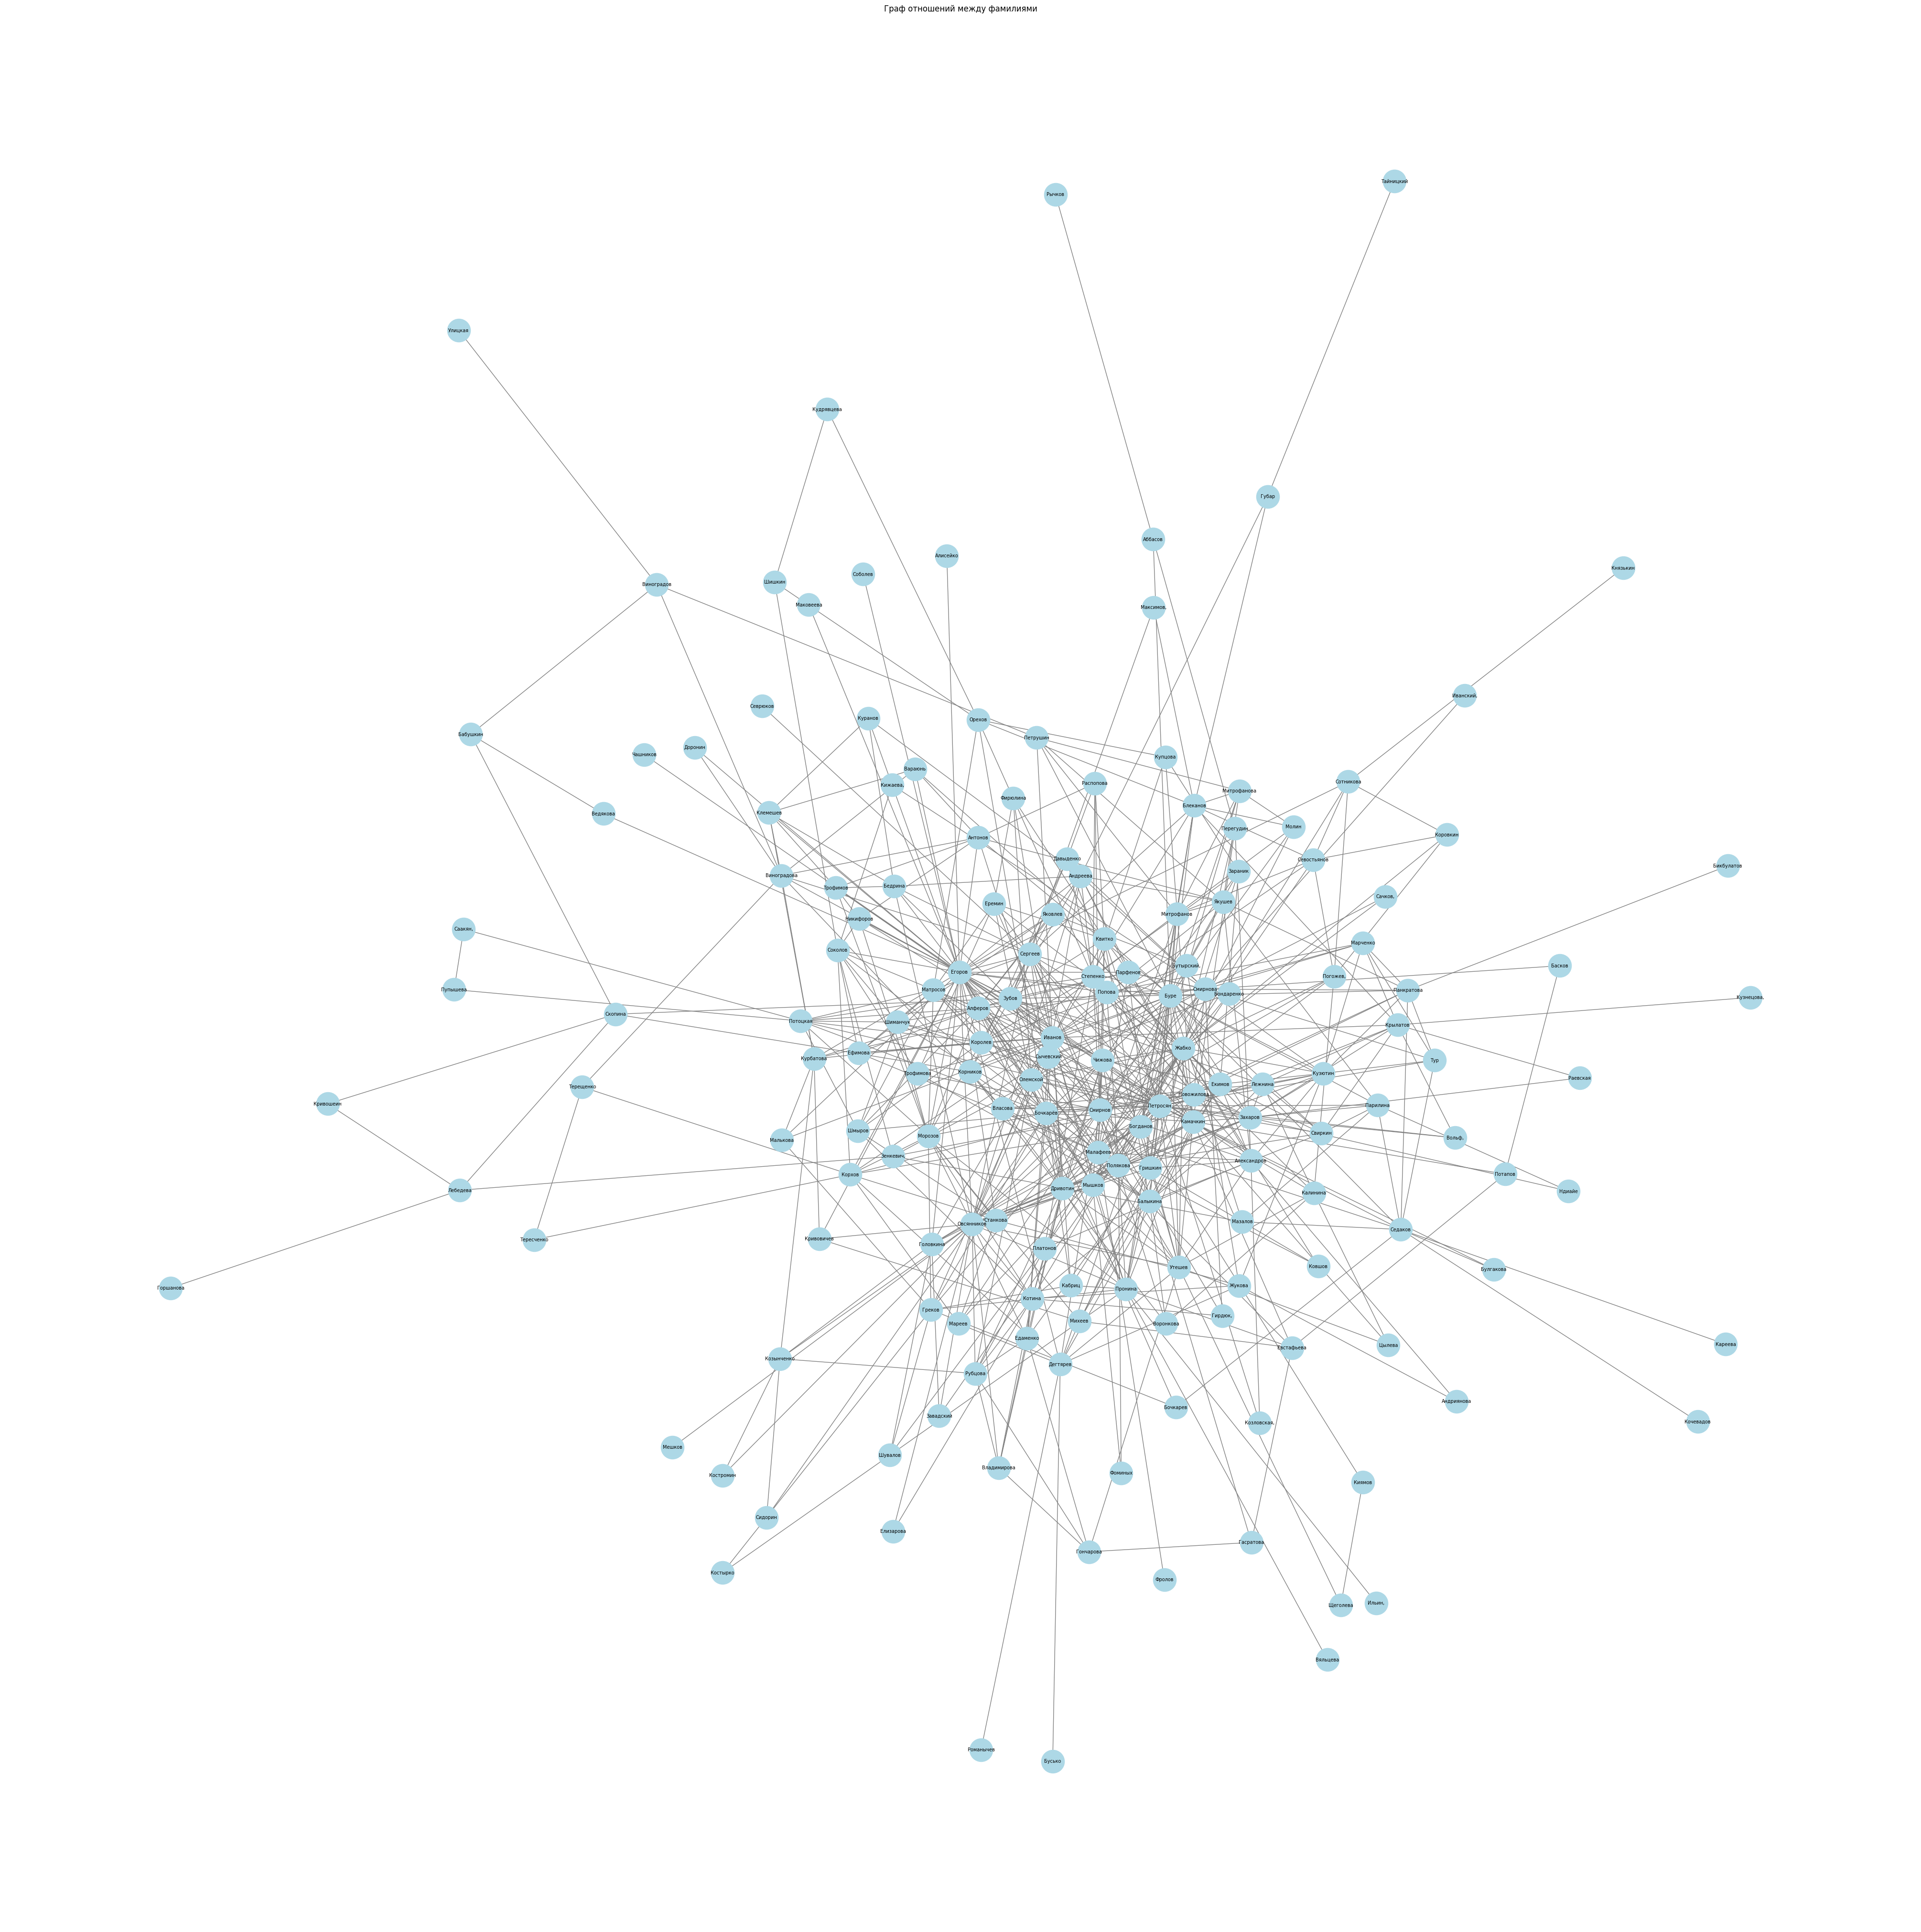

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for author, names in relations_normalized.items():
    for name in names:
        G.add_edge(author, name)

plt.figure(figsize=(40, 40))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1200, font_size=7)
plt.title('Граф отношений между фамилиями')
plt.show()

In [20]:
G.number_of_nodes()
plt.savefig('plot_graf.png')

<Figure size 640x480 with 0 Axes>

In [21]:
import json

# Сохраняем граф в формате node-link (удобно для JSON)
from networkx.readwrite import json_graph

graph_data = json_graph.node_link_data(G)
with open('relations_graph.json', 'w', encoding='utf-8') as f:
    json.dump(graph_data, f, ensure_ascii=False, indent=2)

print('Граф сохранён в relations_graph.json')

Граф сохранён в relations_graph.json
